In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x = mnist.data.to_numpy()
X,y = mnist['data'],mnist['target']

In [5]:
x.shape

(70000, 784)

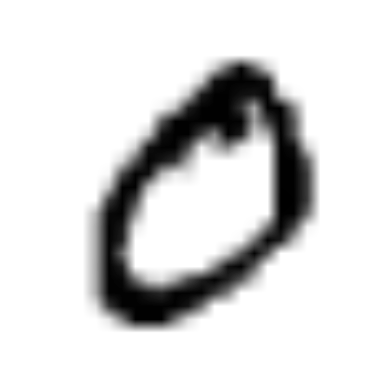

In [7]:
some_image = x[1]
image = some_image.reshape(28,28)
plt.imshow(image, cmap = mpl.cm.binary, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
y[1]

'0'

In [9]:
y =y.astype(np.uint8)

In [10]:
y[0]

5

In [11]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [12]:
xtrain,xtest,ytrain,ytest = X[:60000],X[60000:],y[:60000],y[60000:]

In [13]:
xtest

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.9 MB


In [16]:
ytrain5 = (ytrain == 5)
ytest5 = (ytest == 5)


In [17]:
from sklearn.linear_model import SGDClassifier
cl = SGDClassifier(random_state = 42)
cl.fit(xtrain,ytrain5)
some_digit = x[0]
cl.predict([some_digit])

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [19]:
cross_val_score(cl,xtrain,ytrain5,cv = 3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [20]:
ypred = cross_val_predict(cl,xtrain,ytrain5,cv = 3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain5,ypred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
from sklearn.metrics import f1_score
f1_score(ytrain5,ypred)

0.7325171197343847

In [23]:
y_score = cross_val_predict(cl,xtrain,ytrain5,cv = 3,method = 'decision_function')

In [24]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(ytrain5,y_score)


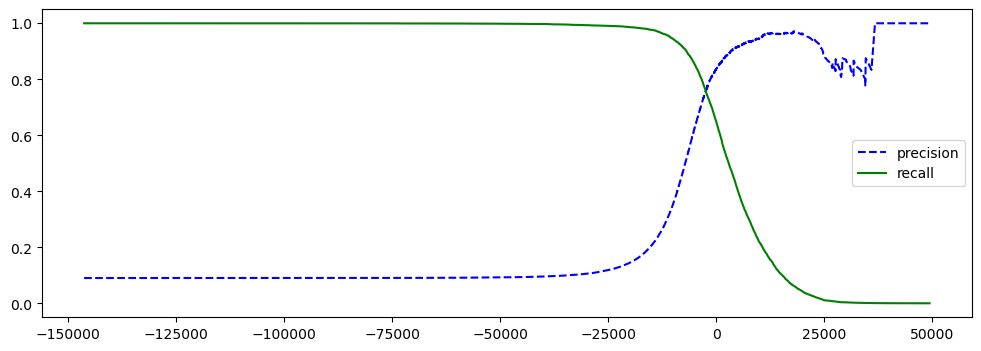

In [25]:
plt.figure(figsize=(12,4))
plt.plot(threshold,precision[:-1],'b--',label = 'precision')
plt.plot(threshold,recall[:-1],'g-',label = 'recall')
plt.legend()
plt.show()

In [26]:
threshold90 = threshold[np.argmax(precision>=0.90)]
threshold90

3370.0194991439557

In [27]:
newpred = (y_score>=threshold90)

In [28]:
from sklearn.metrics import precision_score,recall_score
precision_score(ytrain5,newpred)

0.9000345901072293

In [29]:
recall_score(ytrain5,newpred)

0.4799852425751706

In [30]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(ytrain5,y_score)

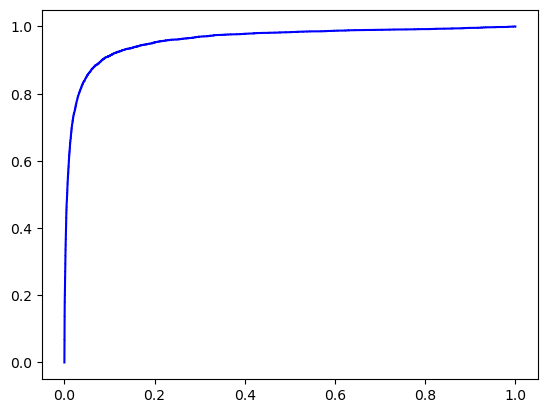

In [31]:
plt.plot(fpr,tpr,'b-')

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain5,y_score)

0.9604938554008616

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(random_state = 42)
y_scores = cross_val_predict(model_random,xtrain,ytrain5,cv =3,method = 'predict_proba')
yyy = y_scores[:,1]


In [37]:
f,t,threshold = roc_curve(ytrain5,yyy)

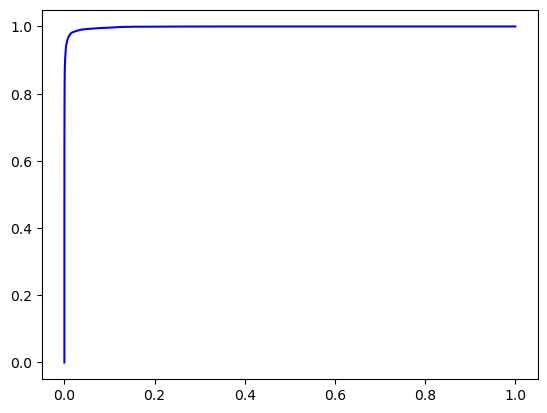

In [45]:
plt.plot(f,t,'b-')

In [111]:
roc_auc_score(ytrain5,yyy)

0.9983436731328145

In [71]:
model_random.fit(xtrain,ytrain)
model_random.predict([some_digit])

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

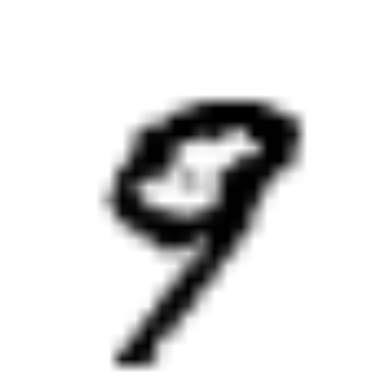

In [72]:
some_image = x[87]
image = some_image.reshape(28,28)
plt.imshow(image, cmap = mpl.cm.binary, interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
new_pred = cross_val_predict(model_random,xtrain,ytrain,cv = 3)
confusionmat = confusion_matrix(ytrain,new_pred)

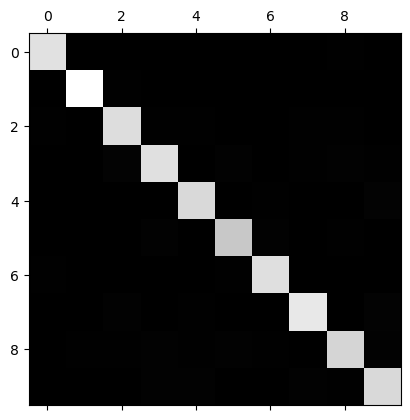

In [80]:
plt.matshow(confusionmat,cmap = plt.cm.gray)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model_k = KNeighborsClassifier()
model_k.fit(xtrain,ytrain)

KNeighborsClassifier()

In [85]:
kpred = cross_val_predict(model_k,xtrain,ytrain,cv=3)

In [89]:
f1_score(ytrain,kpred,average = 'macro')

0.9672164755274893

In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[3,5,7,9],
             'weights':['uniform','distane']
             }
grid = GridSearchCV(model_k,param_grid,cv = 3,scoring = 'accuracy') 

In [99]:
grid.fit(xtrain,ytrain)

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ThinkPad\anaconda3\Lib

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distane']},
             scoring='accuracy')

In [103]:
finalpred = grid.predict(xtest)
f1_score(ytest,finalpred,average ='macro')

0.9703749561556656

In [115]:
grid.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [117]:
gird.best_score_

NameError: name 'gird' is not defined

In [123]:
ran_pred = model_random.predict(xtest)

In [127]:
f1_score(ytest,ran_pred,average = 'macro')

0.970260923866558